# Proyek Analisis Data: Bike Sharing

- Nama: Riko Yan Suryana
- Email: rikoyan23@gmail.com
- Id Dicoding: riko_yan_suryana

## Menentukan Pertanyaan Bisnis

- Berapa banyak total pengguna dalam beberapa bulan terakhir
- Season apa yang paling banyak penggunanya dan paling sedikit
- Bagaimana kebiasaan pengguna dalam menggunakan bike rental

## Menyiapkan Library yang dipakai

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv('https://raw.githubusercontent.com/RikoYan/ds-p/main/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

In [3]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [4]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


Pada dataset day_df ini kita tidak menemui data yang hilang ataupun data yang terduplikasi tapi ada kesalahan tipe data pada kolom dteday yang seharusnya bertipe data datetime

In [5]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Tampilan di atas kita tidak menemukan adanya inaccurate value

### Cleaning Data

mengubah tipe data di kolom dteday yang tadinya bertipe objek menjadi bertipe datetime

In [6]:
datetime_columns = ["dteday"]

for column in datetime_columns:
    day_df[column] = pd.to_datetime(day_df[column])

In [7]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

## Exploratory Data Analysis (EDA)

Mencari berapa jumlah pengguna tiap bulannya dengan menggunakan grupby

In [8]:
day_df.groupby(['yr', 'mnth']).agg({
    'cnt':"sum"
})

cnt
yr mnth        
0  1      38189
   2      48215
   3      64045
   4      94870
   5     135821
   6     143512
   7     141341
   8     136691
   9     127418
   10    123511
   11    102167
   12     87323
1  1      96744
   2     103137
   3     164875
   4     174224
   5     195865
   6     202830
   7     203607
   8     214503
   9     218573
   10    198841
   11    152664
   12    123713

Keterangan:
- yr
- 0 = tahun 2011
- 1 = tahun 2012

Menggunakan groupby untuk melihat berapa jumlah pengguna casual dan registered berdasarkan season di dua tahun terakhir

In [9]:
day_df.groupby(['yr', 'season']).agg({
    'casual':"sum",
    'registered':"sum"
})

casual  registered
yr season                    
0  1        21425      128575
   2        77564      269752
   3        95450      324200
   4        52813      273324
1  1        39197      282151
   2       125958      445315
   3       130641      510838
   4        76969      438507

keterangan:
- season
- 1 = springer
- 2 = summer
- 3 = fall
- 4 = winter

Untuk mempermudah visualisasi nantinya, kita akan menambahkan kolom baru bernama 'nameseason' berisi keterangan season seperti di atas

In [10]:
def conditions(s):
    if (s['season'] == 1):
        return "springer"
    elif (s['season'] == 2):
        return "summer"
    elif (s['season'] == 3):
        return "fall"
    else:
        return "winter"

day_df['nameseason'] = day_df.apply(conditions, axis=1)

Melihat rata rata penggunaan pengguna berdasarkan weekend, hari kerja, dan hari libur nasional

In [11]:
day_df.groupby(['holiday', 'workingday']).agg({
    'casual':"mean",
    'registered':"mean"
})

casual   registered
holiday workingday                          
0       0           1401.776190  2987.909524
        1            606.570000  3978.250000
1       0           1064.714286  2670.285714

keterangan:
- holliday + workingday
- 0 + 0 = Weekend (sabtu dan minggu)
- 0 + 1 = workingday (senin sampai jum'at)
- 1 + 0 = holyday (hari libur nasional)

Membuat kolom baru bernama 'weekdesc' berisi keterangan hari holiday, working day, dan weekend agar mudah di visualisasi

In [12]:
def conditions(s):
    if (s['holiday'] == 0) and (s['workingday'] == 1):
        return "working day"
    elif (s['holiday'] == 1) and (s['workingday'] == 0):
        return "holiday"
    else:
        return "weekend"

day_df['weekdesc'] = day_df.apply(conditions, axis=1)

Memastikan hasil yang di atas mari kita lihat pengguna berdasarkan hari minggu sampai senin agar lebih detail.

In [13]:
day_df.groupby(by='weekday').agg({
    'casual':"mean",
    'registered':"mean"
})

,casual,registered
weekday,,
0,1338.295238,2890.533333
1,674.133333,3663.990476
2,556.182692,3954.480769
3,551.144231,3997.394231
4,590.961538,4076.298077
5,752.288462,3938.000000
6,1465.257143,3085.285714


keterangan:
- 0 = minggu
- 1 = senin
- 2 = selasa
- 3 = rabu
- 4 = kamis
- 5 = jumat
- 6 = sabtu

## Visualization & Explanatory Analysis

### Pertanyaan 1 : Berapa banyak total pengguna dalam beberapa bulan terakhir

agar mudah divisualisasi, dataframe day_df di bagi menjadi dua yaitu data tahun 2011 dan data tahun 2012

In [14]:
only_2011_df = day_df[(day_df['dteday'] > "2011-01-01") & (day_df['dteday'] < "2011-12-31")]

In [15]:
only_2012_df = day_df[(day_df['dteday'] > "2012-01-01") & (day_df['dteday'] < "2012-12-31")]

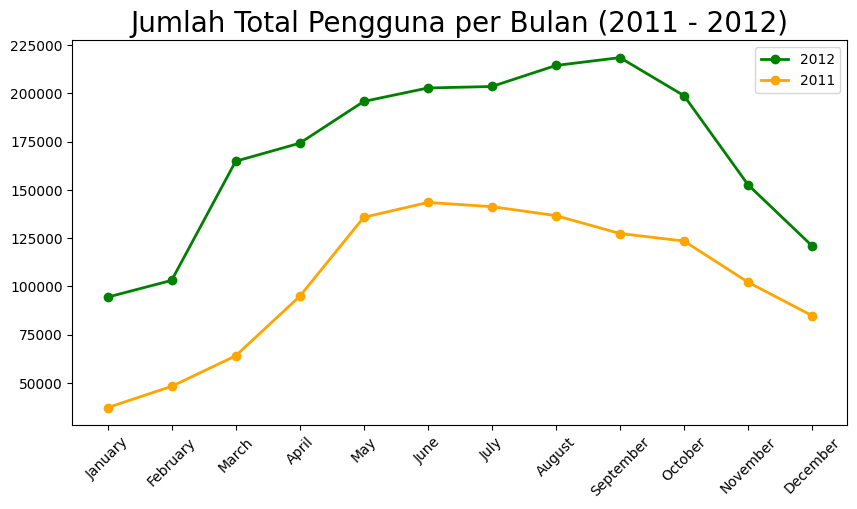

In [16]:
month_cnt_sum11_df = only_2011_df.resample(rule='M', on='dteday').agg({
    "cnt": "sum"
})
month_cnt_sum11_df.index = month_cnt_sum11_df.index.strftime('%B') #mengubah format order date menjadi per bulan

month_cnt_sum11_df = month_cnt_sum11_df.reset_index()
month_cnt_sum11_df.rename(columns={
    "dteday": "bulan",
    "cnt": "jumlah_total"
}, inplace=True)


month_cnt_sum12_df = only_2012_df.resample(rule='M', on='dteday').agg({
    "cnt": "sum"
})
month_cnt_sum12_df.index = month_cnt_sum12_df.index.strftime('%B') #mengubah format order date menjadi per bulan

month_cnt_sum12_df = month_cnt_sum12_df.reset_index()
month_cnt_sum12_df.rename(columns={
    "dteday": "bulan",
    "cnt": "jumlah_total"
}, inplace=True)

plt.figure(figsize=(10, 5))
plt.plot(month_cnt_sum12_df["bulan"], month_cnt_sum12_df["jumlah_total"], marker='o', linewidth=2, color="green", label=2012)
plt.plot(month_cnt_sum11_df["bulan"], month_cnt_sum11_df["jumlah_total"], marker='o', linewidth=2, color="orange", label=2011)
plt.title("Jumlah Total Pengguna per Bulan (2011 - 2012)", loc="center", fontsize=20)
plt.xticks(rotation=45, fontsize=10) # memutar font bulan agar mudah terbaca
plt.yticks(fontsize=10)
plt.legend()
plt.show()

### Pertanyaan 2: Season apa yang paling banyak penggunanya dan paling sedikit

jumlah pengguna casual dan registered berdasarkan season di tahun 2011

<Axes: ylabel='nameseason'>

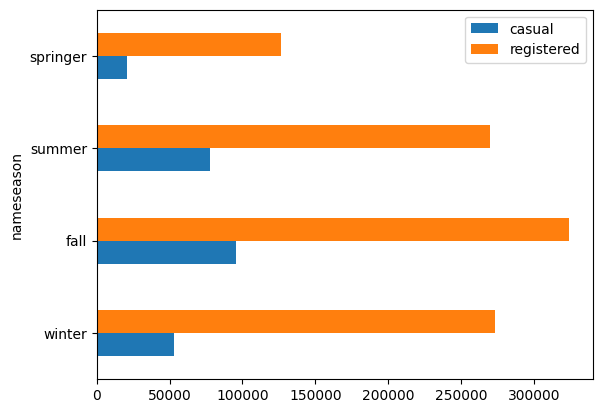

In [26]:
season_sum11_df = only_2011_df.groupby(by='nameseason').agg({
    'season':"unique",
    'casual':"sum",
    'registered':"sum"
})
season_sum11_df.sort_values(by='season', ascending=False).plot(kind='barh')

jumlah pengguna casual dan registered berdasarkan season di tahun 2012

<Axes: ylabel='nameseason'>

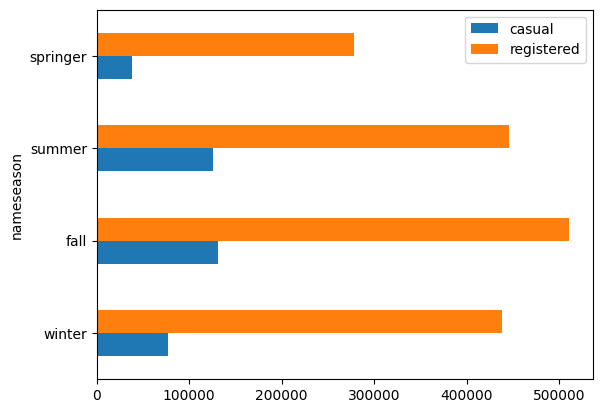

In [18]:
season_sum12_df = only_2012_df.groupby(by='nameseason').agg({
    'season':"unique",
    'casual':"sum",
    'registered':"sum"
})
season_sum12_df.sort_values(by='season', ascending=False).plot(kind='barh')

### Pertanyaan 3: Bagaimana kebiasaan pengguna dalam menggunakan bike rental

Membuat visualisasi perbandingan rata-rata pengguna terhadap hari weekend, workingday, dan hari holiday dalam dua tahun

In [19]:
hw_mean_df = day_df.groupby(['weekdesc']).agg({
    'casual':"mean",
    'registered':"mean"
})

C:\Users\r\AppData\Local\Temp\ipykernel_11032\4202013870.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


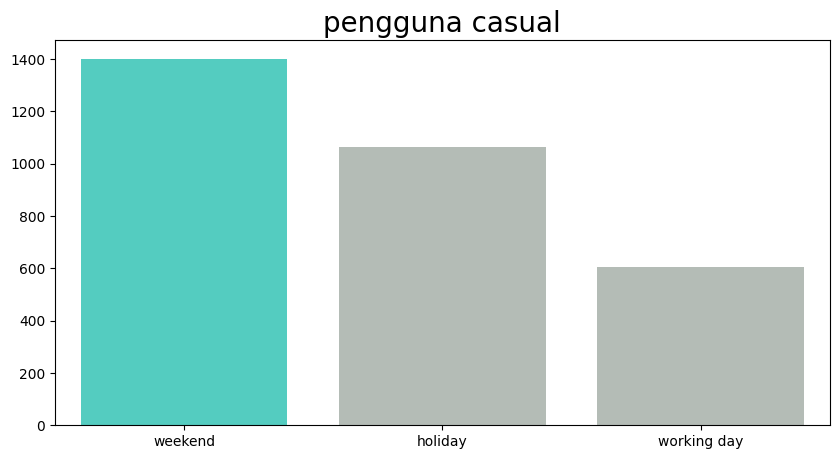

In [24]:
fig, ax = plt.subplots(figsize=(10, 5))

colors = ["#40E0D0", "#B2BEB5", "#B2BEB5"]
 
sns.barplot(
    y="casual", 
    x="weekdesc",
    data=hw_mean_df.sort_values(by="casual", ascending=False), 
    palette=colors,
)
plt.title("pengguna casual", loc="center", fontsize=20)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=10)
plt.show()

C:\Users\r\AppData\Local\Temp\ipykernel_11032\1521700623.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


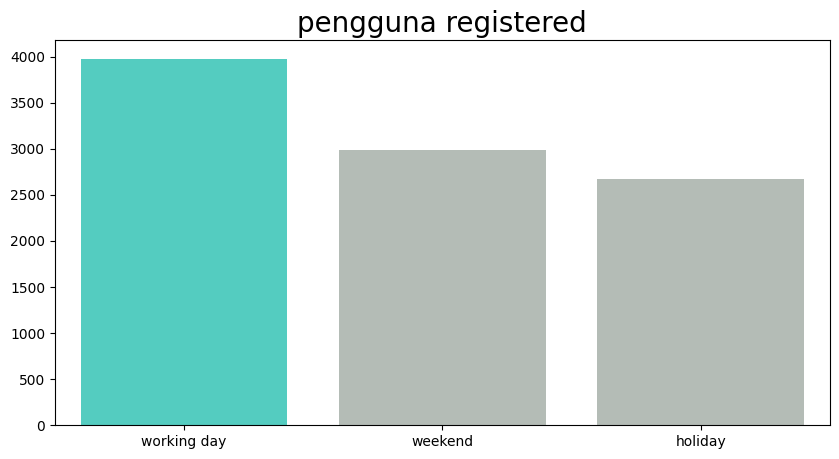

In [23]:
fig, ax = plt.subplots(figsize=(10, 5))

colors = ["#40E0D0", "#B2BEB5", "#B2BEB5"]
 
sns.barplot(
    y="registered", 
    x="weekdesc",
    data=hw_mean_df.sort_values(by="registered", ascending=False), 
    palette=colors,
)
plt.title("pengguna registered", loc="center", fontsize=20)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=10)
plt.show()

terakhir kita buat file csv yang sudah melalui proses assessing data sampai visualisasi

In [22]:
day_df.to_csv("main_data.csv", index=False)

## Conclusion

- Conclusion pertanyaan 1 : Berapa banyak total pengguna dalam beberapa bulan terakhir?
    - seperti tahun sebelumnya total pengguna dalam beberapa bulan terakhir mengalami penurunan dan biasanya akan barangsur kembali meningkat **januari** dan meningkat signifikan pada bulan **februari** atau **maret**.
<br>
- Conclusion pertanyaan 2 : Season apa yang paling banyak penggunanya dan paling sedikit?
    - di tahun 2011 dan 2012 season yang paling banyak penggunanya, baik itu pengguna casual dan registered yaitu **season Fall** atau season ketiga. dan sebaliknya season dengan pengguna yang paling sedikit yaitu **season springer** atau season pertama.
<br>
- Conclusion pertanyaan 3 : Bagaimana kebiasaan pengguna dalam menggunakan bike rental?
    - pengguna casual rata rata menggunakan bike rental di hari weekend dan pengguna registered rata rata mengunakan bike rental di working day.